In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Celebrities

## Remove celebrities that the model does not know

In [9]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/WHO_VISION_Experiment_Results_molmo2.csv")
df['Knows_celeb'] = df.apply(lambda row: row['Instance'] in row['Response'], axis=1)
unknown_celebs = df[df["Knows_celeb"] == False]['Instance'].unique() 
unknown_celebs = unknown_celebs[unknown_celebs != "The Rock"] # "Remove The Rock from unknown list bc it knows Dwayne Johnson"
unknown_celebs

array(['Tom Hanks', 'Lady Gaga', 'Zendaya', 'Gal Gadot',
       'Priyanka Chopra', 'Cardi B', 'Bruno Mars', 'Adele',
       'Shawn Mendes', 'Roger Federer', 'Jack Ma', 'Michelle Obama',
       'Jimmy Fallon', 'Stephen Colbert', "Conan O'Brien", 'Trevor Noah',
       'Floyd Mayweather', 'Jamie Oliver', 'Martha Stewart',
       'Reese Witherspoon', 'Anne Hathaway', 'Natalie Portman',
       'Matthew McConaughey', 'Matt Damon', 'Ben Affleck',
       'Julia Roberts', 'Nicole Kidman', 'Cate Blanchett',
       'Charlize Theron', 'Idris Elba', 'Samuel L', 'Jackie Chan',
       'Jet Li', 'Steven Spielberg', 'Quentin Tarantino',
       'Christopher Nolan', 'James Cameron', 'Stephen King', 'John Green',
       'Kendrick Lamar', 'Katy Perry', 'Demi Lovato', 'Camila Cabello',
       'Megan Thee Stallion', 'J Balvin', 'Shakira', 'Ricky Martin',
       'Courteney Cox', 'Matthew Perry', 'Kit Harington', 'Emilia Clarke',
       'Sophie Turner', 'Maisie Williams', 'Winona Ryder',
       'David Harbour'

In [10]:
df[df['Instance'] == 'Chadwick Boseman']

,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Prob_A,Prob_B,Prob_C,Prob_D,Ground_Truth,Mis_Answer_Label,Knows_celeb
441,148,Chadwick Boseman,Temporal_error,mis_knowledge1,NaN,Give me the name of the brand in the picture.,Answer: John David Washington,0.600535,0.009119,0.002613,0.387734,D,C,False
442,148,Chadwick Boseman,location_error,mis_knowledge1,NaN,Give me the name of the brand in the picture.,Answer: John David Washington,0.600535,0.009119,0.002613,0.387734,D,C,False
443,148,Chadwick Boseman,Career_error,mis_knowledge1,NaN,Give me the name of the brand in the picture.,Answer: John David Washington,0.600535,0.009119,0.002613,0.387734,C,B,False


## Which ones can it ans correctly

In [11]:
df_inherent_vision = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/MOLMO_Results/MOLMO-No_RAG_VISION_Experiment_Results.csv")
df_inherent_vision

def actual_ans(row):
    query_list = row['Query'].split(" ")
    ans_GT = query_list[query_list.index(row['Ground_Truth']+")") + 1]
    ans_Param = query_list[query_list.index(row['Mis_Answer_Label']+")") + 1]
    return ans_GT, ans_Param
actual_ans(df_inherent_vision.iloc[0])
gt_list = []
param_list = []
for i in range(df_inherent_vision.shape[0]):
    gt, param = actual_ans(df_inherent_vision.iloc[0])
    gt_list.append(gt)
    param_list.append(param)
df_inherent_vision['Actual_GT'] = gt_list
df_inherent_vision['Actual_Param'] = param_list
df_inherent_vision
df_inherent_text = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/MOLMO_Results/MOLMO-No_RAG_Experiment_Results.csv")
df_inherent_vision = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/MOLMO_Results/MOLMO-No_RAG_VISION_Experiment_Results.csv")
df_inherent_text

def get_correct_indices(df):
    # 1. Define the probability columns
    prob_cols = ['A', 'B', 'C', 'D']
    
    # 2. Find the column name with the max value for each row (e.g., "Prob_A")
    # idxmax(axis=1) returns the column label of the maximum value
    predicted_col = df['Response'].apply(lambda x: x[0] if x[0] in prob_cols else x[1])
    # 3. Clean the prediction to match Ground_Truth format (e.g., "Prob_A" -> "A")
    predicted_choice = predicted_col.str.replace('Prob_', '')
    
    # 4. Compare with Ground Truth
    # We strip whitespace from both just to be safe (e.g. " A" vs "A")
    is_correct = predicted_choice.str.strip() == df['Ground_Truth'].str.strip()
    
    return is_correct

# Get the boolean mask (True/False) for both dataframes
text_correct_mask = get_correct_indices(df_inherent_text)
vision_correct_mask = get_correct_indices(df_inherent_vision)

# Find where BOTH are True
# We use the bitwise AND operator '&'
both_correct_mask = text_correct_mask & vision_correct_mask

# Extract the actual indices
correct_indices = df_inherent_text.index[both_correct_mask].tolist()

print(f"Number of matches: {len(correct_indices)}")
print("Indices:", correct_indices)

Number of matches: 584
Indices: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 22, 23, 26, 27, 28, 29, 32, 33, 34, 35, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 64, 65, 70, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 93, 94, 95, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 112, 113, 116, 117, 118, 119, 122, 123, 124, 125, 128, 129, 130, 131, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 146, 147, 148, 149, 154, 155, 160, 161, 164, 165, 166, 167, 172, 173, 178, 179, 182, 183, 184, 185, 188, 189, 190, 191, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 214, 215, 226, 227, 228, 229, 234, 235, 236, 237, 238, 239, 242, 243, 244, 245, 248, 249, 250, 251, 252, 253, 256, 257, 262, 263, 266, 267, 268, 269, 272, 273, 274, 275, 280, 281, 284, 285, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 304, 305, 308, 309, 310, 311, 314, 315, 316, 317, 322, 323, 324, 325, 326, 327, 328, 329, 330

## Text

In [12]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/MOLMO_Results/MOLMO-RAG_Experiment_Results.csv")
df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
df_inherent_text_corr
corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
df = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
df = df[~df['Instance'].isin(unknown_celebs)]
df['Category'].value_counts()


Category
Career_error      150
location_error    110
Temporal_error     36
Name: count, dtype: int64

Overall Accuracy: 28.72%
Category
Career_error      56.666667
Temporal_error     0.000000
location_error     0.000000
Name: Is_Correct, dtype: float64


/tmp/ipykernel_1995562/2263519944.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')


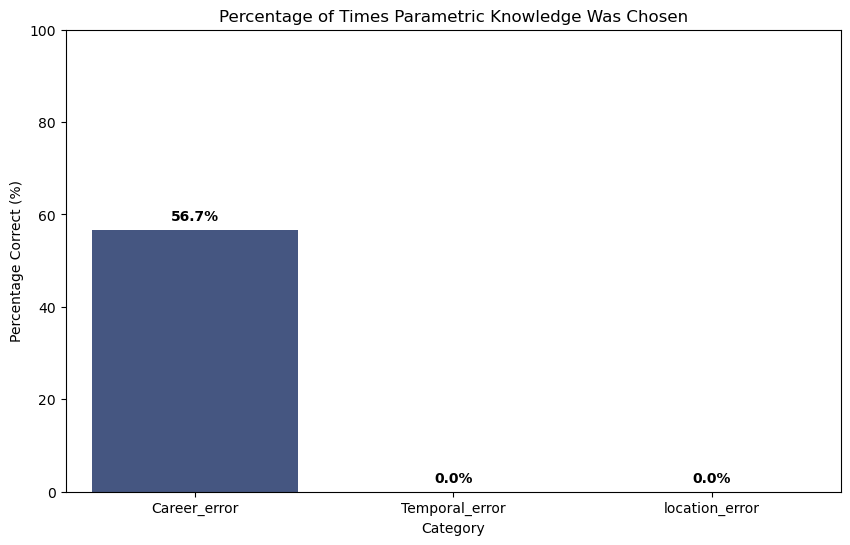

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

probs = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].values
df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']] = probs / probs.sum(axis=1, keepdims=True)

# ---------------------------------------------------------
# ANALYSIS CODE START
# ---------------------------------------------------------

# 1. Determine the model's chosen answer (highest probability)
# idxmax returns the column name (e.g., "Prob_A"). We strip "Prob_" to get "A".
#df['Predicted_Choice'] = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].idxmax(axis=1).apply(lambda x: x.split('_')[1])
choices = ['A','B','C','D']
df['Predicted_Choice'] = df['Response'].apply(lambda x: x[0] if x[0] in choices else x[1])
# 2. Check if it matches Ground Truth
df['Is_Correct'] = df['Predicted_Choice'] == df['Ground_Truth']

# 3. Calculate Percentage
overall_accuracy = df['Is_Correct'].mean() * 100
accuracy_by_category = df.groupby('Category')['Is_Correct'].mean() * 100

print(f"Overall Accuracy: {overall_accuracy:.2f}%")
print(accuracy_by_category)

# 4. Visualization
plt.figure(figsize=(10, 6))

# We can plot accuracy by category
sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')

plt.ylabel('Percentage Correct (%)')
plt.xlabel('Category')
plt.title('Percentage of Times Parametric Knowledge Was Chosen')
plt.ylim(0, 100)

# Add text labels on bars
for i, v in enumerate(accuracy_by_category.values):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontweight='bold')
plt.show()

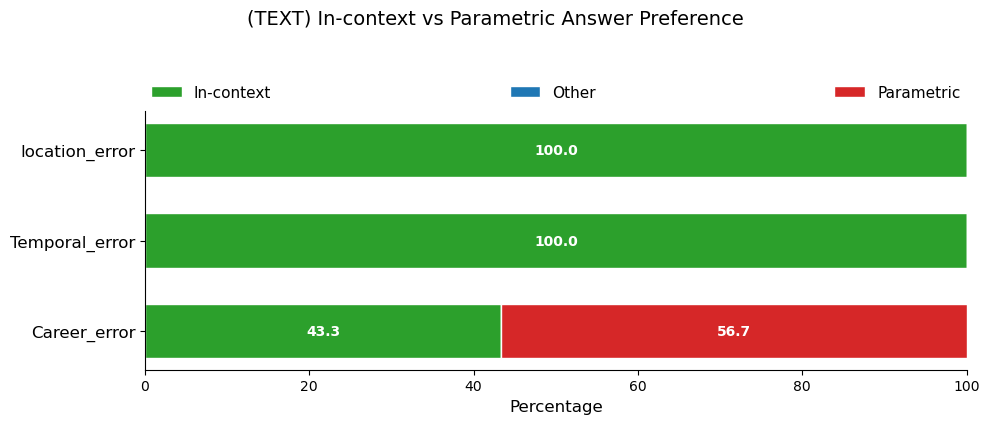

In [14]:
def classify_outcome(row):
    # Clean whitespace just in case (e.g., " A" vs "A")
    pred = str(row['Predicted_Choice'])
    gt = str(row['Ground_Truth'])
    mis = str(row['Mis_Answer_Label'])
    
    if pred == gt:
        return "Parametric"
    elif pred == mis:
        return "In-context"
    else:
        return "Other"

df['Outcome'] = df.apply(classify_outcome, axis=1)

group_col = 'Category' # Change to 'Model' if you have a model column
outcome_counts = df.groupby([group_col, 'Outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_pct = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Ensure all columns exist (in case one category has 0 "Other")
for col in ['In-context', 'Parametric', 'Other']:
    if col not in outcome_pct.columns:
        outcome_pct[col] = 0

# Reorder columns to match the visual preference
# (e.g., In-context (Left), Parametric (Middle/Right), Other (Right))
outcome_pct = outcome_pct[['In-context', 'Other', 'Parametric']]


# ---------------------------------------------------------
# 4. Plotting
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 4))

# Define Colors matching the vibe of the reference
# Reference: Knowledge(Red), Other(Blue), Vision(Green)
# Your mapping: In-context (GT), Parametric (Mis), Other
colors = {
    'In-context': '#2ca02c',  # Green (Success/Ground Truth)
    'Other': '#1f77b4',       # Blue
    'Parametric': '#d62728'   # Red (Conflict/Mis-knowledge)
}
# Or if you want to strictly match the reference image's color-to-concept mapping:
# colors = {'In-context': '#d62728', 'Other': '#1f77b4', 'Parametric': '#2ca02c'}

# Stacked Bar Plot
y_pos = np.arange(len(outcome_pct))
height = 0.6

left_offset = np.zeros(len(outcome_pct))

categories = outcome_pct.columns # ['In-context', 'Other', 'Parametric']

for cat in categories:
    values = outcome_pct[cat].values
    ax.barh(y_pos, values, height, left=left_offset, color=colors[cat], label=cat, edgecolor='white')
    
    # Add percentage text inside bars
    for i, (val, left) in enumerate(zip(values, left_offset)):
        if val > 5: # Only show text if the bar is wide enough
            # Text color logic: white for dark bars
            ax.text(left + val/2, i, f'{val:.1f}', 
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    
    left_offset += values

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(outcome_pct.index, fontsize=12)
ax.set_xlim(0, 100)
ax.set_xlabel('Percentage', fontsize=12)

# Move Legend to top (like the reference)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., frameon=False, fontsize=11)

# Remove top and right spines for cleanliness
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.suptitle(
    "(TEXT) In-context vs Parametric Answer Preference",
    fontsize=14,
    y=1.05  # adjust vertical position
)

plt.tight_layout()
plt.show()

## Vision

In [15]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/MOLMO_Results/MOLMO-RAG_VISION_Experiment_Results.csv")
df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
df_inherent_text_corr
corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
df = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
print(df['Category'].value_counts())
df = df[~df['Instance'].isin(unknown_celebs)]
df

Category
Career_error      278
location_error    206
Temporal_error     84
Name: count, dtype: int64


,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Prob_A,Prob_B,Prob_C,Prob_D,Ground_Truth,Mis_Answer_Label
0,1,Taylor Swift,location_error,mis_knowledge1,"Taylor Swift was born on December 13, 1989. Ta...",What is the nationality of the entity? Answers...,B) Canadian,0.000031,1.000000,0.000179,0.001503,D,B
1,1,Taylor Swift,location_error,mis_knowledge2,"Taylor Swift was born on December 13, 1989. Ta...",What is the nationality of the entity? Answers...,A) Mexican,0.796875,0.002533,0.000303,0.201172,D,A
2,1,Taylor Swift,Career_error,mis_knowledge1,"Taylor Swift was born on December 13, 1989. Ta...",What is the occupation of the entity? Answers:...,B) novelist,0.306641,0.691406,0.001175,0.000263,A,B
3,1,Taylor Swift,Career_error,mis_knowledge2,"Taylor Swift was born on December 13, 1989. Ta...",What is the occupation of the entity? Answers:...,D) chef,0.333984,0.002396,0.000607,0.664062,A,D
4,2,Elon Musk,Temporal_error,mis_knowledge1,"Elon Musk was born on June 28, 1970. Elon Musk...",What year was the entity born? Answers: A) 197...,A) 1970,1.000000,0.000458,0.000755,0.000278,C,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,141,Seth Rogen,Career_error,mis_knowledge2,"Seth Rogen was born on April 15, 1982. Seth Ro...",What is the occupation of the entity? Answers:...,"B) comedian, actor, writer, producer, and dire...",0.000015,0.988281,0.000045,0.010986,B,D
548,146,Kristen Stewart,location_error,mis_knowledge1,"Kristen Stewart was born on April 9, 1990. Kri...",What is the nationality of the entity? Answers...,A) Canadian,1.000000,0.000139,0.000123,0.000912,D,A
549,146,Kristen Stewart,location_error,mis_knowledge2,"Kristen Stewart was born on April 9, 1990. Kri...",What is the nationality of the entity? Answers...,C) Mexican,0.000454,0.000130,0.992188,0.009094,D,C
550,146,Kristen Stewart,Career_error,mis_knowledge1,"Kristen Stewart was born on April 9, 1990. Kri...",What is the occupation of the entity? Answers:...,C) actress,0.001465,0.406250,0.589844,0.000786,C,B


Overall Accuracy: 40.54%
Category
Career_error      79.333333
Temporal_error     0.000000
location_error     0.909091
Name: Is_Correct, dtype: float64


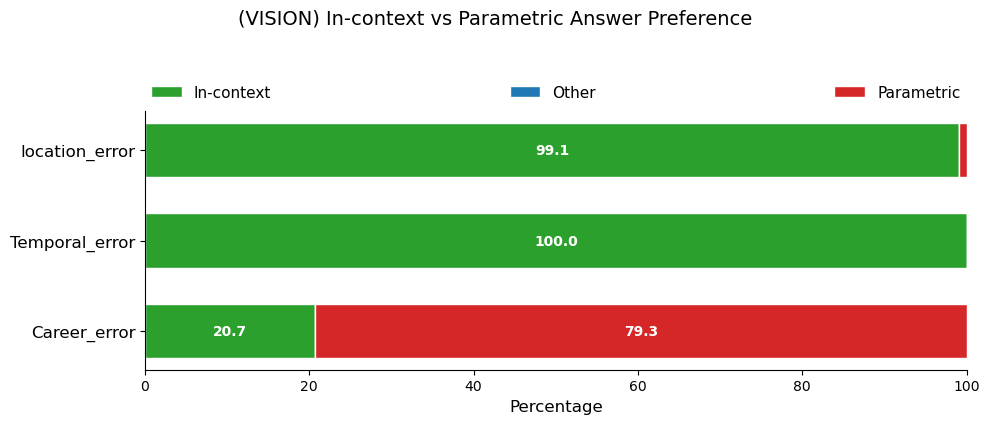

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

probs = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].values
df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']] = probs / probs.sum(axis=1, keepdims=True)

# ---------------------------------------------------------
# ANALYSIS CODE START
# ---------------------------------------------------------

# 1. Determine the model's chosen answer (highest probability)
# idxmax returns the column name (e.g., "Prob_A"). We strip "Prob_" to get "A".
choices = ['A','B','C','D']
df['Predicted_Choice'] = df['Response'].apply(lambda x: x[0] if x[0] in choices else x[1])

# 2. Check if it matches Ground Truth
df['Is_Correct'] = df['Predicted_Choice'] == df['Ground_Truth']

# 3. Calculate Percentage
overall_accuracy = df['Is_Correct'].mean() * 100
accuracy_by_category = df.groupby('Category')['Is_Correct'].mean() * 100

print(f"Overall Accuracy: {overall_accuracy:.2f}%")
print(accuracy_by_category)

def classify_outcome(row):
    # Clean whitespace just in case (e.g., " A" vs "A")
    pred = str(row['Predicted_Choice'])
    gt = str(row['Ground_Truth'])
    mis = str(row['Mis_Answer_Label'])
    
    if pred == gt:
        return "Parametric"
    elif pred == mis:
        return "In-context"
    else:
        return "Other"

df['Outcome'] = df.apply(classify_outcome, axis=1)


group_col = 'Category' # Change to 'Model' if you have a model column
outcome_counts = df.groupby([group_col, 'Outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_pct = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Ensure all columns exist (in case one category has 0 "Other")
for col in ['In-context', 'Parametric', 'Other']:
    if col not in outcome_pct.columns:
        outcome_pct[col] = 0

# Reorder columns to match the visual preference
# (e.g., In-context (Left), Parametric (Middle/Right), Other (Right))
outcome_pct = outcome_pct[['In-context', 'Other', 'Parametric']]


# ---------------------------------------------------------
# 4. Plotting
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 4))

# Define Colors matching the vibe of the reference
# Reference: Knowledge(Red), Other(Blue), Vision(Green)
# Your mapping: In-context (GT), Parametric (Mis), Other
colors = {
    'In-context': '#2ca02c',  # Green (Success/Ground Truth)
    'Other': '#1f77b4',       # Blue
    'Parametric': '#d62728'   # Red (Conflict/Mis-knowledge)
}
# Or if you want to strictly match the reference image's color-to-concept mapping:
# colors = {'In-context': '#d62728', 'Other': '#1f77b4', 'Parametric': '#2ca02c'}

# Stacked Bar Plot
y_pos = np.arange(len(outcome_pct))
height = 0.6

left_offset = np.zeros(len(outcome_pct))

categories = outcome_pct.columns # ['In-context', 'Other', 'Parametric']

for cat in categories:
    values = outcome_pct[cat].values
    ax.barh(y_pos, values, height, left=left_offset, color=colors[cat], label=cat, edgecolor='white')
    
    # Add percentage text inside bars
    for i, (val, left) in enumerate(zip(values, left_offset)):
        if val > 5: # Only show text if the bar is wide enough
            # Text color logic: white for dark bars
            ax.text(left + val/2, i, f'{val:.1f}', 
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    
    left_offset += values

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(outcome_pct.index, fontsize=12)
ax.set_xlim(0, 100)
ax.set_xlabel('Percentage', fontsize=12)

# Move Legend to top (like the reference)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., frameon=False, fontsize=11)

# Remove top and right spines for cleanliness
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.suptitle(
    "(VISION) In-context vs Parametric Answer Preference",
    fontsize=14,
    y=1.05  # adjust vertical position
)

plt.tight_layout()
plt.show()

# LOGOS

# Figure out which logos the model knows

## Text/Lang

In [17]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/MOLMO_Results/MOLMO-RAG_Experiment_Results_logo.csv")
# df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
# df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
# df_inherent_text_corr
# corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
# df = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
# df = df[~df['Instance'].isin(unknown_celebs)]
df

,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Prob_A,Prob_B,Prob_C,Prob_D,Ground_Truth,Mis_Answer_Label
0,1,Nike,time_error,mis_knowledge1,Nike was created in 1972. The creator of Nike ...,When was the brand associated with the logo es...,A) 1972,0.996094,0.004059,0.001320,0.000378,C,A
1,1,Nike,time_error,mis_knowledge2,Nike was created in 1958. The creator of Nike ...,When was the brand associated with the logo es...,D) 1958,0.002975,0.000664,0.000277,0.996094,C,D
2,1,Nike,creator_error,mis_knowledge1,Nike was created in 1964. The creator of Nike ...,Who established the brand corresponding to the...,B) Bill Bowerman and Phil Knight,0.003815,0.933594,0.059814,0.002045,B,C
3,1,Nike,creator_error,mis_knowledge2,Nike was created in 1964. The creator of Nike ...,Who established the brand corresponding to the...,D) Steve Jobs and Bill Gates,0.000927,0.100586,0.000265,0.898438,B,D
4,1,Nike,content_error,mis_knowledge1,Nike was created in 1964. The creator of Nike ...,What are the main products of this brand? Answ...,C) athletic footwear,0.005554,0.304688,0.683594,0.005554,C,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,74,Meta,time_error,mis_knowledge2,Meta was created in 2006. The creator of Meta ...,When was the brand associated with the logo es...,A) 2006,0.984375,0.007996,0.007050,0.002014,D,A
440,74,Meta,creator_error,mis_knowledge1,Meta was created in 2004. The creator of Meta ...,Who established the brand corresponding to the...,B) Elon Musk,0.376953,0.621094,0.001274,0.000322,A,B
441,74,Meta,creator_error,mis_knowledge2,Meta was created in 2004. The creator of Meta ...,Who established the brand corresponding to the...,D) Bill Gates,0.201172,0.003250,0.000931,0.792969,A,D
442,74,Meta,content_error,mis_knowledge1,Meta was created in 2004. The creator of Meta ...,What are the main products of this brand? Answ...,A) gourmet food products,0.988281,0.008057,0.002609,0.000401,C,A


Overall Accuracy: 25.90%
Category
content_error    33.783784
creator_error    43.918919
time_error        0.000000
Name: Is_Correct, dtype: float64


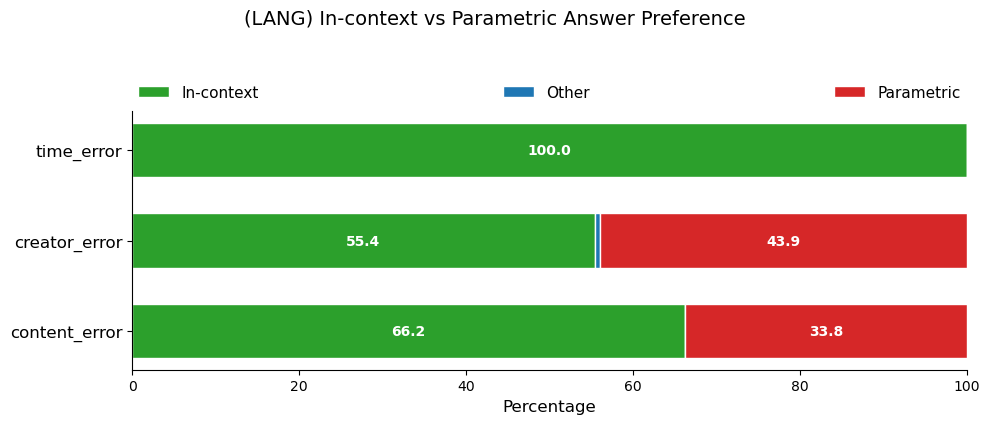

In [18]:
probs = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].values
df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']] = probs / probs.sum(axis=1, keepdims=True)

# ---------------------------------------------------------
# ANALYSIS CODE START
# ---------------------------------------------------------

# 1. Determine the model's chosen answer (highest probability)
# idxmax returns the column name (e.g., "Prob_A"). We strip "Prob_" to get "A".
choices = ['A','B','C','D']
df['Predicted_Choice'] = df['Response'].apply(lambda x: x[0] if x[0] in choices else x[1])

# 2. Check if it matches Ground Truth
df['Is_Correct'] = df['Predicted_Choice'] == df['Ground_Truth']

# 3. Calculate Percentage
overall_accuracy = df['Is_Correct'].mean() * 100
accuracy_by_category = df.groupby('Category')['Is_Correct'].mean() * 100

print(f"Overall Accuracy: {overall_accuracy:.2f}%")
print(accuracy_by_category)

def classify_outcome(row):
    # Clean whitespace just in case (e.g., " A" vs "A")
    pred = str(row['Predicted_Choice'])
    gt = str(row['Ground_Truth'])
    mis = str(row['Mis_Answer_Label'])
    
    if pred == gt:
        return "Parametric"
    elif pred == mis:
        return "In-context"
    else:
        return "Other"

df['Outcome'] = df.apply(classify_outcome, axis=1)

group_col = 'Category' # Change to 'Model' if you have a model column
outcome_counts = df.groupby([group_col, 'Outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_pct = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Ensure all columns exist (in case one category has 0 "Other")
for col in ['In-context', 'Parametric', 'Other']:
    if col not in outcome_pct.columns:
        outcome_pct[col] = 0

# Reorder columns to match the visual preference
# (e.g., In-context (Left), Parametric (Middle/Right), Other (Right))
outcome_pct = outcome_pct[['In-context', 'Other', 'Parametric']]


# ---------------------------------------------------------
# 4. Plotting
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 4))

# Define Colors matching the vibe of the reference
# Reference: Knowledge(Red), Other(Blue), Vision(Green)
# Your mapping: In-context (GT), Parametric (Mis), Other
colors = {
    'In-context': '#2ca02c',  # Green (Success/Ground Truth)
    'Other': '#1f77b4',       # Blue
    'Parametric': '#d62728'   # Red (Conflict/Mis-knowledge)
}
# Or if you want to strictly match the reference image's color-to-concept mapping:
# colors = {'In-context': '#d62728', 'Other': '#1f77b4', 'Parametric': '#2ca02c'}

# Stacked Bar Plot
y_pos = np.arange(len(outcome_pct))
height = 0.6

left_offset = np.zeros(len(outcome_pct))

categories = outcome_pct.columns # ['In-context', 'Other', 'Parametric']

for cat in categories:
    values = outcome_pct[cat].values
    ax.barh(y_pos, values, height, left=left_offset, color=colors[cat], label=cat, edgecolor='white')
    
    # Add percentage text inside bars
    for i, (val, left) in enumerate(zip(values, left_offset)):
        if val > 5: # Only show text if the bar is wide enough
            # Text color logic: white for dark bars
            ax.text(left + val/2, i, f'{val:.1f}', 
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    
    left_offset += values

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(outcome_pct.index, fontsize=12)
ax.set_xlim(0, 100)
ax.set_xlabel('Percentage', fontsize=12)

# Move Legend to top (like the reference)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., frameon=False, fontsize=11)

# Remove top and right spines for cleanliness
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.suptitle(
    "(LANG) In-context vs Parametric Answer Preference",
    fontsize=14,
    y=1.05  # adjust vertical position
)

plt.tight_layout()
plt.show()

In [19]:
df['Outcome'].value_counts()

Outcome
In-context    328
Parametric    115
Other           1
Name: count, dtype: int64

## VISION

In [20]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/MOLMO_Results/MOLMO-RAG_VISION_Experiment_Results_logo.csv")
# df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
# df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
# df_inherent_text_corr
# corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
# df = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
# df = df[~df['Instance'].isin(unknown_celebs)]
df

,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Prob_A,Prob_B,Prob_C,Prob_D,Ground_Truth,Mis_Answer_Label
0,1,Nike,time_error,mis_knowledge1,Nike was created in 1972. The creator of Nike ...,When was the brand associated with the logo es...,A) 1972,1.000000,0.000404,0.000055,0.000026,C,A
1,1,Nike,time_error,mis_knowledge2,Nike was created in 1958. The creator of Nike ...,When was the brand associated with the logo es...,D) 1958,0.000062,0.000016,0.000007,1.000000,C,D
2,1,Nike,creator_error,mis_knowledge1,Nike was created in 1964. The creator of Nike ...,Who established the brand corresponding to the...,B) Bill Bowerman and Phil Knight,0.000122,0.984375,0.015869,0.000094,B,C
3,1,Nike,creator_error,mis_knowledge2,Nike was created in 1964. The creator of Nike ...,Who established the brand corresponding to the...,D) Steve Jobs and Bill Gates,0.000032,0.039551,0.000007,0.960938,B,D
4,1,Nike,content_error,mis_knowledge1,Nike was created in 1964. The creator of Nike ...,What are the main products of this brand? Answ...,C) athletic footwear,0.000427,0.005920,0.992188,0.000334,C,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,74,Meta,time_error,mis_knowledge2,Meta was created in 2006. The creator of Meta ...,When was the brand associated with the logo es...,A) 2006,0.996094,0.001167,0.002472,0.000486,D,A
440,74,Meta,creator_error,mis_knowledge1,Meta was created in 2004. The creator of Meta ...,Who established the brand corresponding to the...,B) Elon Musk,0.320312,0.679688,0.000353,0.000089,A,B
441,74,Meta,creator_error,mis_knowledge2,Meta was created in 2004. The creator of Meta ...,Who established the brand corresponding to the...,D) Bill Gates,0.026001,0.000024,0.000021,0.972656,A,D
442,74,Meta,content_error,mis_knowledge1,Meta was created in 2004. The creator of Meta ...,What are the main products of this brand? Answ...,A) gourmet food products,1.000000,0.000553,0.000626,0.000021,C,A


Overall Accuracy: 30.18%
Category
content_error    58.783784
creator_error    31.756757
time_error        0.000000
Name: Is_Correct, dtype: float64


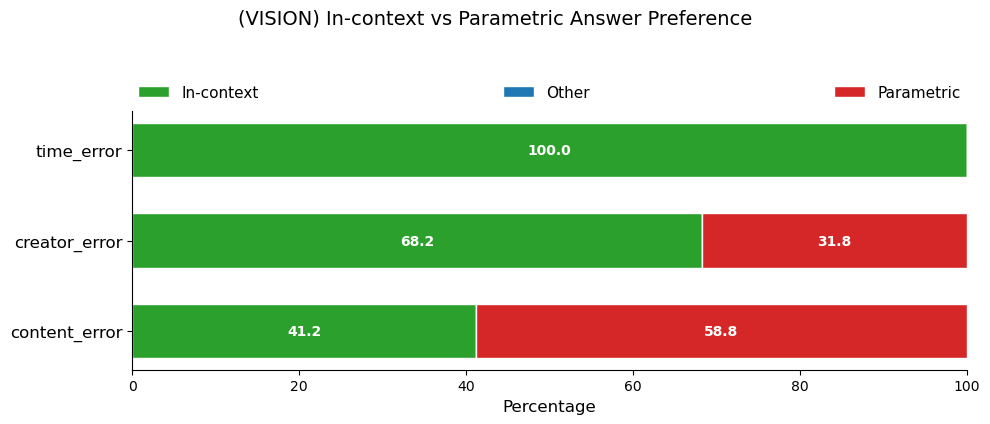

In [21]:
probs = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].values
df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']] = probs / probs.sum(axis=1, keepdims=True)

# ---------------------------------------------------------
# ANALYSIS CODE START
# ---------------------------------------------------------

# 1. Determine the model's chosen answer (highest probability)
# idxmax returns the column name (e.g., "Prob_A"). We strip "Prob_" to get "A".
choices = ['A','B','C','D']
df['Predicted_Choice'] = df['Response'].apply(lambda x: x[0] if x[0] in choices else x[1])

# 2. Check if it matches Ground Truth
df['Is_Correct'] = df['Predicted_Choice'] == df['Ground_Truth']

# 3. Calculate Percentage
overall_accuracy = df['Is_Correct'].mean() * 100
accuracy_by_category = df.groupby('Category')['Is_Correct'].mean() * 100

print(f"Overall Accuracy: {overall_accuracy:.2f}%")
print(accuracy_by_category)

def classify_outcome(row):
    # Clean whitespace just in case (e.g., " A" vs "A")
    pred = str(row['Predicted_Choice'])
    gt = str(row['Ground_Truth'])
    mis = str(row['Mis_Answer_Label'])
    
    if pred == gt:
        return "Parametric"
    elif pred == mis:
        return "In-context"
    else:
        return "Other"

df['Outcome'] = df.apply(classify_outcome, axis=1)

group_col = 'Category' # Change to 'Model' if you have a model column
outcome_counts = df.groupby([group_col, 'Outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_pct = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Ensure all columns exist (in case one category has 0 "Other")
for col in ['In-context', 'Parametric', 'Other']:
    if col not in outcome_pct.columns:
        outcome_pct[col] = 0

# Reorder columns to match the visual preference
# (e.g., In-context (Left), Parametric (Middle/Right), Other (Right))
outcome_pct = outcome_pct[['In-context', 'Other', 'Parametric']]


# ---------------------------------------------------------
# 4. Plotting
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 4))

# Define Colors matching the vibe of the reference
# Reference: Knowledge(Red), Other(Blue), Vision(Green)
# Your mapping: In-context (GT), Parametric (Mis), Other
colors = {
    'In-context': '#2ca02c',  # Green (Success/Ground Truth)
    'Other': '#1f77b4',       # Blue
    'Parametric': '#d62728'   # Red (Conflict/Mis-knowledge)
}
# Or if you want to strictly match the reference image's color-to-concept mapping:
# colors = {'In-context': '#d62728', 'Other': '#1f77b4', 'Parametric': '#2ca02c'}

# Stacked Bar Plot
y_pos = np.arange(len(outcome_pct))
height = 0.6

left_offset = np.zeros(len(outcome_pct))

categories = outcome_pct.columns # ['In-context', 'Other', 'Parametric']

for cat in categories:
    values = outcome_pct[cat].values
    ax.barh(y_pos, values, height, left=left_offset, color=colors[cat], label=cat, edgecolor='white')
    
    # Add percentage text inside bars
    for i, (val, left) in enumerate(zip(values, left_offset)):
        if val > 5: # Only show text if the bar is wide enough
            # Text color logic: white for dark bars
            ax.text(left + val/2, i, f'{val:.1f}', 
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    
    left_offset += values

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(outcome_pct.index, fontsize=12)
ax.set_xlim(0, 100)
ax.set_xlabel('Percentage', fontsize=12)

# Move Legend to top (like the reference)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., frameon=False, fontsize=11)

# Remove top and right spines for cleanliness
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.suptitle(
    "(VISION) In-context vs Parametric Answer Preference",
    fontsize=14,
    y=1.05  # adjust vertical position
)

plt.tight_layout()
plt.show()

In [22]:
df['Outcome'].value_counts()

Outcome
In-context    310
Parametric    134
Name: count, dtype: int64